In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.9.1


In [5]:

#loading the dataset...
cifar=tf.keras.datasets.cifar10
(training_images,training_labels),(testing_images,testing_labels)=cifar.load_data()

In [6]:
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
import numpy as np 

# The labels are an array of integers, in the range [0, 9]. 
# These correspond to the class of clothing item the image represents:
labels = np.unique(testing_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
print('label value \t\t category')
for class_name, label in zip(names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 airplane
1 		 automobile
2 		 bird
3 		 cat
4 		 deer
5 		 dog
6 		 frog
7 		 horse
8 		 ship
9 		 truck


In [9]:

#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=training_images/255.0
testing_images=testing_images/255.0
     

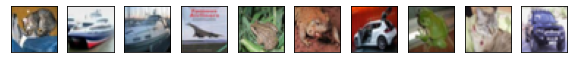

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(testing_images[:10],testing_labels[:10]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    #plt.xlabel(class_names[label])
    i += 1
plt.show()

In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
     

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
model.fit(training_images,training_labels,epochs=35)


Epoch 1/35
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8587 - accuracy: 0.3250
Epoch 2/35
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6890 - accuracy: 0.3949
Epoch 3/35
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6198 - accuracy: 0.4201
Epoch 4/35
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5746 - accuracy: 0.4387
Epoch 5/35
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5515 - accuracy: 0.4488
Epoch 6/35
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5258 - accuracy: 0.4545
Epoch 7/35
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5105 - accuracy: 0.4621
Epoch 8/35
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4934 - accuracy: 0.4653
Epoch 9/35
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4763 - accuracy: 0.4735
Epoch 10/35
1563/1563 [==============================] - 4s 3ms/step - loss: 1.468

In [14]:
test_loss,test_acc=model.evaluate(testing_images,testing_labels)


313/313 [==============================] - 1s 895us/step - loss: 1.4798 - accuracy: 0.4807


In [15]:
print("Test accuracy:",test_acc)

Test accuracy: 0.48069998621940613


In [17]:
y_pred=model.predict(testing_images)
y_pred_classes=np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 1ms/step


In [26]:
confusion=tf.math.confusion_matrix(labels=testing_labels.squeeze(),predictions=y_pred_classes,num_classes=10)

In [20]:
y_pred.shape

(10000, 10)

In [21]:
y_pred_classes.shape

(10000,)

In [22]:
y_pred_classes

array([5, 8, 8, ..., 2, 4, 7], dtype=int64)

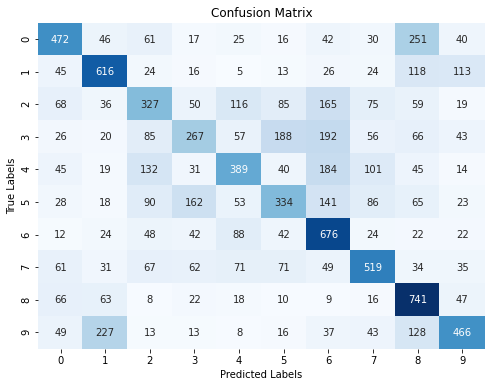

In [29]:
import seaborn as sns
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
accuracy = accuracy_score(testing_labels.squeeze(), y_pred_classes)
precision = precision_score(testing_labels.squeeze(), y_pred_classes, average='weighted')
recall = recall_score(testing_labels.squeeze(), y_pred_classes, average='weighted')
f1 = f1_score(testing_labels.squeeze(), y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Generate and print classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
report = classification_report(testing_labels.squeeze(), y_pred_classes, target_names=class_names)
print(report)

Accuracy: 0.4807
Precision: 0.4783
Recall: 0.4807
F1-Score: 0.4714
              precision    recall  f1-score   support

    airplane       0.54      0.47      0.50      1000
  automobile       0.56      0.62      0.59      1000
        bird       0.38      0.33      0.35      1000
         cat       0.39      0.27      0.32      1000
        deer       0.47      0.39      0.43      1000
         dog       0.41      0.33      0.37      1000
        frog       0.44      0.68      0.54      1000
       horse       0.53      0.52      0.53      1000
        ship       0.48      0.74      0.59      1000
       truck       0.57      0.47      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000

